In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = '4_results.csv'

df = pd.read_csv(file_path)

base_times = df[df['Processes'] == 1][['MatrixSize', 'Method', 'Time_s']]
base_times = base_times.rename(columns={'Time_s': 'T_serial'})

df = df.merge(base_times, on=['MatrixSize', 'Method'], how='left')

df['Speedup'] = df['T_serial'] / df['Time_s']
df['Efficiency'] = df['Speedup'] / df['Processes']
df['Configuration'] = 'Nodes=' + df['Nodes'].astype(str) + ', N=' + df['MatrixSize'].astype(str)
df['Nodes_Cat'] = df['Nodes'].astype(str) + " Node(s)"
Methods = df['Method'].unique()

df.head()

,Nodes,Processes,MatrixSize,Method,Time_s,T_serial,Speedup,Efficiency,Configuration,Nodes_Cat
0,1,1,512,Striped,0.107461,0.107461,1.0,1.0,"Nodes=1, N=512",1 Node(s)
1,1,1,512,Fox,0.085065,0.085065,1.0,1.0,"Nodes=1, N=512",1 Node(s)
2,1,1,1024,Striped,0.802977,0.802977,1.0,1.0,"Nodes=1, N=1024",1 Node(s)
3,1,1,1024,Fox,0.668083,0.668083,1.0,1.0,"Nodes=1, N=1024",1 Node(s)
4,1,1,2048,Striped,8.887940,8.887940,1.0,1.0,"Nodes=1, N=2048",1 Node(s)


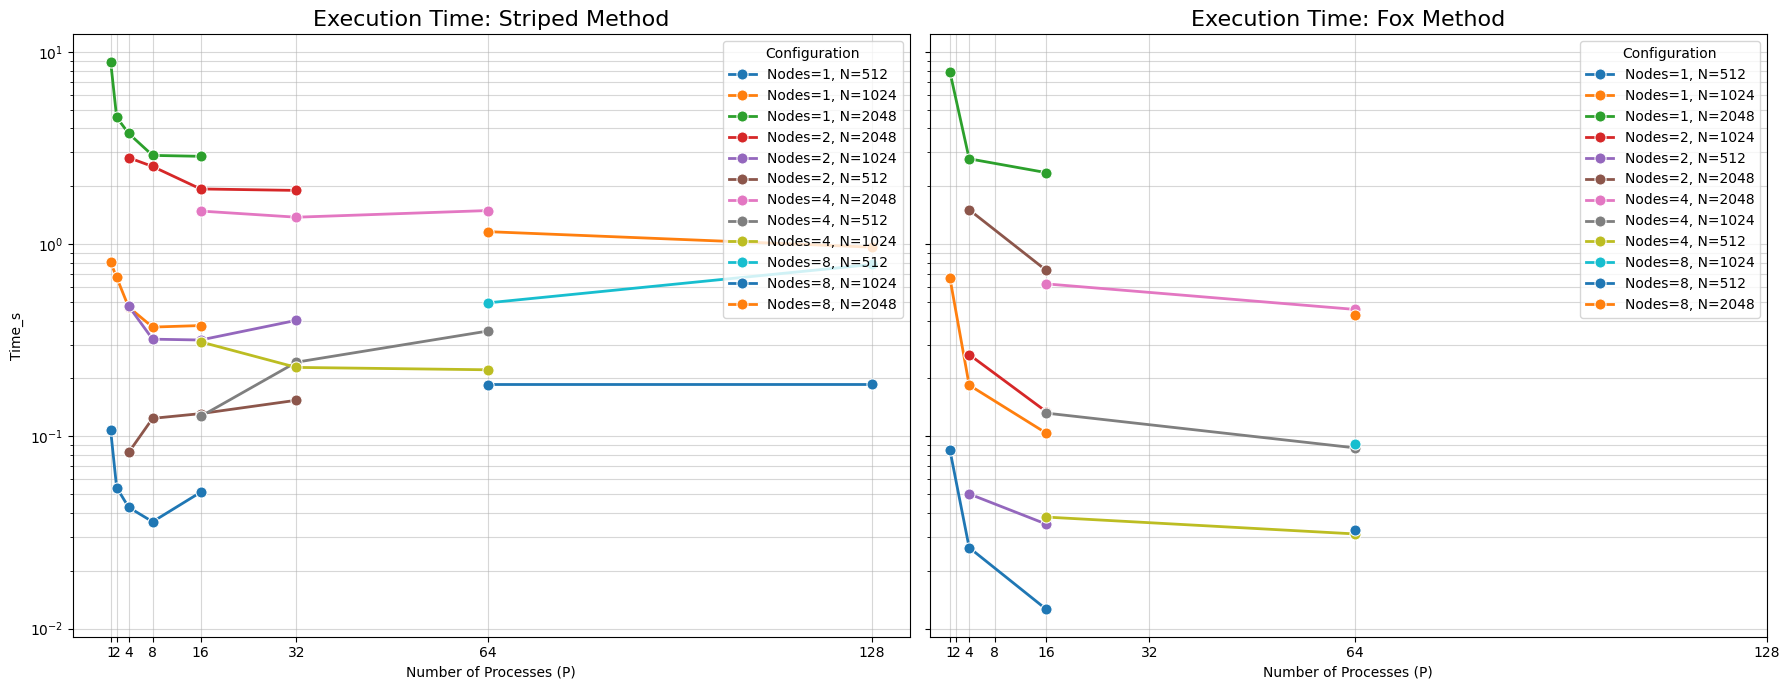

In [11]:
fig, axes = plt.subplots(1, len(Methods), figsize=(18, 7), sharey=True)

for i, alg in enumerate(Methods):
    ax = axes[i]
    subset = df[df['Method'] == alg].sort_values(by='Processes')

    sns.lineplot(data=subset, x='Processes', y='Time_s', 
                    hue='Configuration',
                    palette='tab10',
                    marker='o', markersize=8, linewidth=2, 
                    ax=ax)

    ax.set_title(f'Execution Time: {alg} Method', fontsize=16)
    ax.set_xlabel('Number of Processes (P)')
    
    #ax.set_xscale('log', base=2)
    ax.set_xticks(sorted(df['Processes'].unique()))
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

    ax.set_yscale('log')
    
    ax.grid(True, which="both", ls="-", alpha=0.5)
    ax.legend(title='Configuration', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()

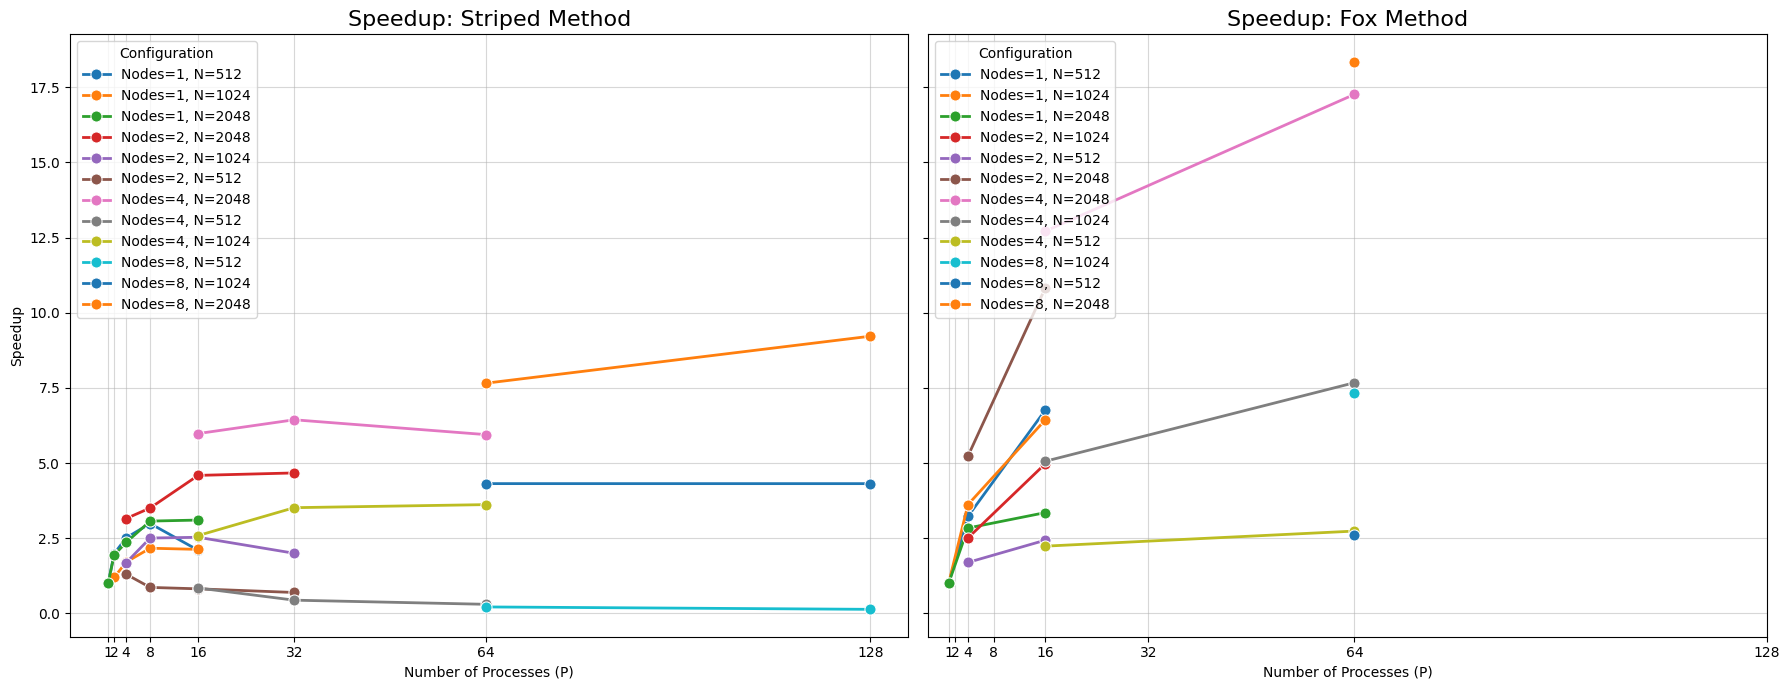

In [12]:
fig, axes = plt.subplots(1, len(Methods), figsize=(18, 7), sharey=True)

for i, alg in enumerate(Methods):
    ax = axes[i]
    subset = df[df['Method'] == alg].sort_values(by='Processes')

    sns.lineplot(data=subset, x='Processes', y='Speedup', 
                    hue='Configuration',
                    palette='tab10',
                    marker='o', markersize=8, linewidth=2, 
                    ax=ax)

    ax.set_title(f'Speedup: {alg} Method', fontsize=16)
    ax.set_xlabel('Number of Processes (P)')
    
    ax.set_xticks(sorted(df['Processes'].unique()))
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    
    ax.grid(True, which="both", ls="-", alpha=0.5)
    ax.legend(title='Configuration', loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

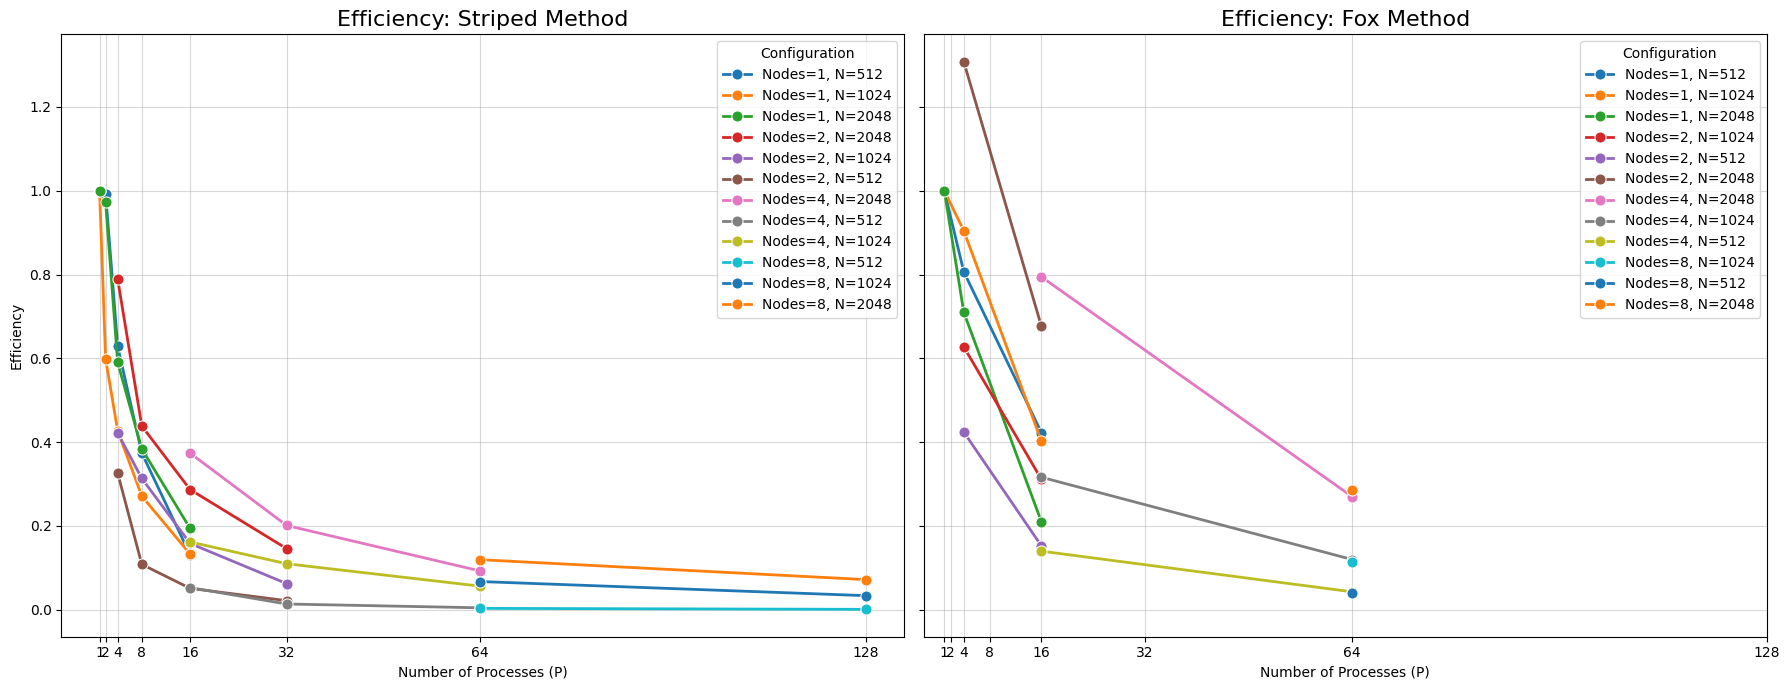

In [6]:
fig, axes = plt.subplots(1, len(Methods), figsize=(18, 7), sharey=True)

for i, alg in enumerate(Methods):
    ax = axes[i]
    subset = df[df['Method'] == alg].sort_values(by='Processes')

    sns.lineplot(data=subset, x='Processes', y='Efficiency', 
                    hue='Configuration',
                    palette='tab10',
                    marker='o', markersize=8, linewidth=2, 
                    ax=ax)

    ax.set_title(f'Efficiency: {alg} Method', fontsize=16)
    ax.set_xlabel('Number of Processes (P)')
    
    ax.set_xticks(sorted(df['Processes'].unique()))
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    
    ax.grid(True, which="both", ls="-", alpha=0.5)
    ax.legend(title='Configuration', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()